<a href="https://colab.research.google.com/github/JonathanGironHound5/PDI/blob/master/Clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/Procesamiento Digital de Imagenes'
os.chdir(path)
!pwd
#graficar imagenes estaticas en el notebook
%matplotlib inline

/content/drive/My Drive/Procesamiento Digital de Imagenes


In [0]:
def displayGray3(a,b,c,title1="original",title2="Edited",title3="Edited"):
  plt.figure(figsize=(15,15))
  plt.subplot(131),plt.imshow(a,cmap='gray'),plt.title(title1)
  plt.xticks([]),plt.yticks([])
  plt.subplot(132),plt.imshow(b,cmap='gray'),plt.title(title2)
  plt.xticks([]),plt.yticks([])
  plt.subplot(133),plt.imshow(c,cmap='gray'),plt.title(title3)
  plt.xticks([]),plt.yticks([])
  
  plt.show()
  
  
  
def displayGray2(a,b, title1="original",title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(a,cmap='gray'),plt.title(title1)
  plt.xticks([]),plt.yticks([])
  plt.subplot(122),plt.imshow(b,cmap='gray'),plt.title(title2)
  plt.xticks([]),plt.yticks([])
 
  
  plt.show()
  
  
  
def displayColor3(a,b,c,title1="original",title2="Edited",title3="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131),plt.imshow(a),plt.title(title1)
  plt.xticks([]),plt.yticks([])
  plt.subplot(132),plt.imshow(b),plt.title(title2)
  plt.xticks([]),plt.yticks([])
  plt.subplot(133),plt.imshow(c),plt.title(title3)
  plt.xticks([]),plt.yticks([])
  
  plt.show()
  
  
def displayColor8(a,b,title1="original",title2="Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(a),plt.title(title1)
  plt.xticks([]),plt.yticks([])
  plt.subplot(122),plt.imshow(b),plt.title(title2)
  plt.xticks([]),plt.yticks([])
 
  
  plt.show()
  
  
  
def readRGB(imgPath):
  img=cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

#Brillantes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


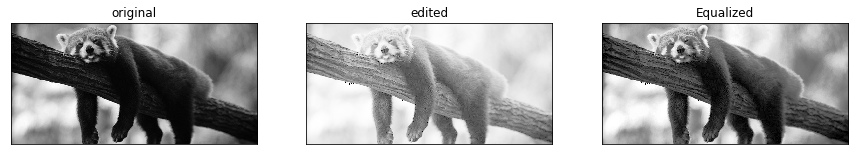

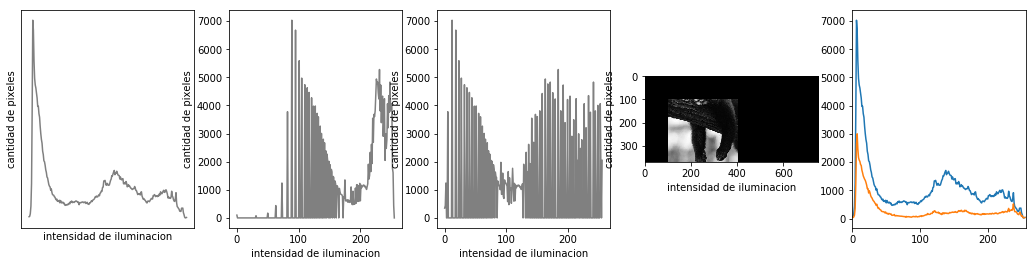

In [164]:
#cargar imagen
img=cv2.imread('Panda.jpg',0)

#aplicar transformada logaritmica 
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255

#especifica el tipo de datos
img_log = np.array(img_log,dtype=np.uint8)
#mostrar imagen
img2 = cv2.equalizeHist(img_log)
displayGray3(img,img_log,img2,'original','edited',"Equalized")
#Crear mascara
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:500, 100:400] = 255
masked_img =cv2.bitwise_and(img,img,mask = mask)

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_log],[0],None,[256],[0,256]) 
hist3 = cv2.calcHist([img2],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.figure(figsize=(18,4))
plt.subplot(151),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.xticks([]),plt.yticks([])
plt.subplot(152),plt.plot(hist2,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(153),plt.plot(hist3,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(154),plt.imshow(masked_img,'gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(155), plt.plot(hist),plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

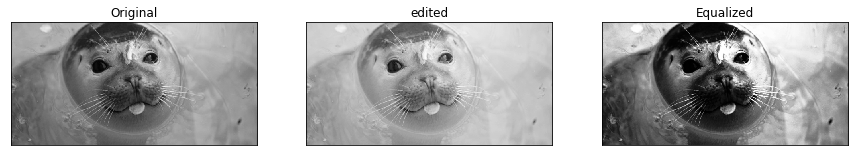

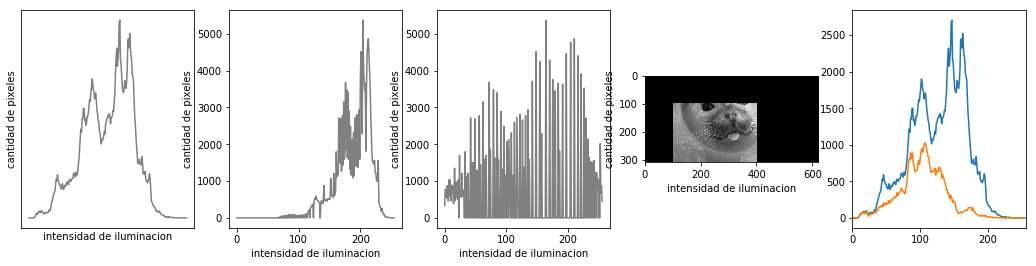

In [162]:
img =cv2.imread('Foca.jpg',0)

#apply gamma=2.2 on the normalised image and then multiply by scaling cons
#gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')
#similarly, apply Gamma=0.4
gamma_point_four2 = np.array(255*(img/255)**0.4,dtype='uint8')
img2 = cv2.equalizeHist(gamma_point_four2)
#Display the images in subplots
displayGray3(img,gamma_point_four2,img2,'Original','edited',"Equalized")
#Crear mascara
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:500, 100:400] = 255
masked_img =cv2.bitwise_and(img,img,mask = mask)

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
hist2 = cv2.calcHist([gamma_point_four2],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img2],[0],None,[256],[0,256])
 
plt.figure(figsize=(18,4))
plt.subplot(151),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.xticks([]),plt.yticks([])
plt.subplot(152),plt.plot(hist2,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(153),plt.plot(hist3,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(154),plt.imshow(masked_img,'gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(155), plt.plot(hist),plt.plot(hist_mask)
plt.xlim([0,256])
  

  
plt.show()



#Oscuras


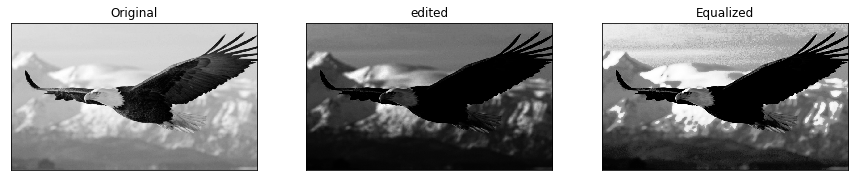

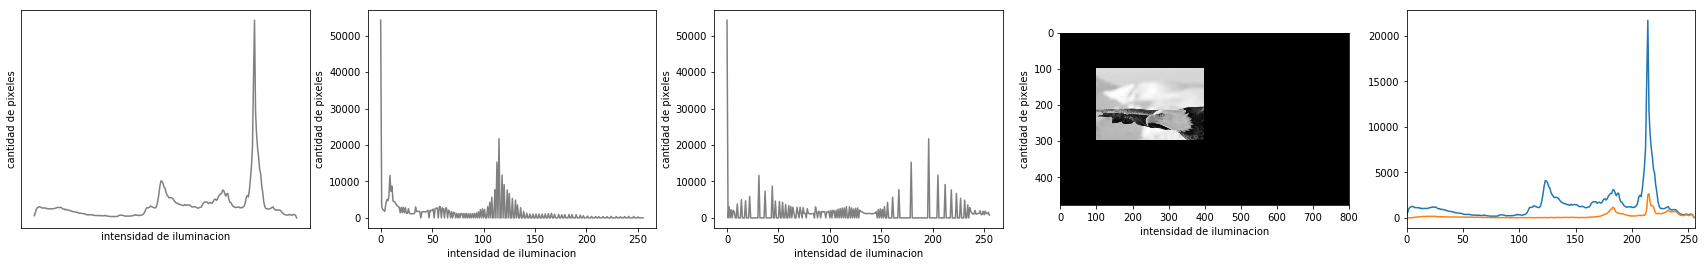

In [163]:
img =cv2.imread('Aguila.jpg',0)

#apply gamma=2.2 on the normalised image and then multiply by scaling cons
#gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')
#similarly, apply Gamma=0.4
gamma_point_four1 = np.array(255*(img/255)**4.5,dtype='uint8')
img2 = cv2.equalizeHist(gamma_point_four1 )
#Display the images in subplots
displayGray3(img,gamma_point_four1,img2,'Original','edited',"Equalized")
#Crear mascara
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300, 100:400] = 255
masked_img =cv2.bitwise_and(img,img,mask = mask)

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
hist2 = cv2.calcHist([gamma_point_four1],[0],None,[256],[0,256])
hist3 = cv2.calcHist([img2],[0],None,[256],[0,256])
 
plt.figure(figsize=(30,4))
plt.subplot(151),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.xticks([]),plt.yticks([])
plt.subplot(152),plt.plot(hist2,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(153),plt.plot(hist3,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(154),plt.imshow(masked_img,'gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.subplot(155), plt.plot(hist),plt.plot(hist_mask)
plt.xlim([0,256])

 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


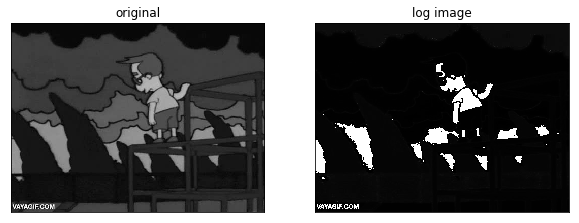

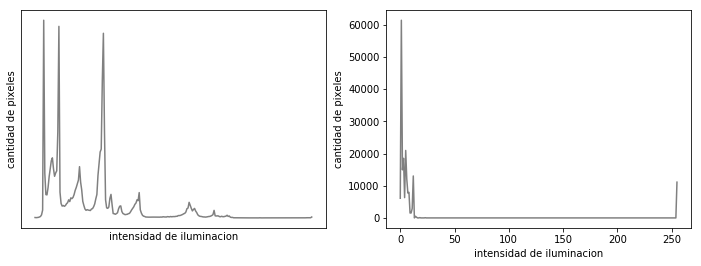

In [131]:
#cargar imagen
img=cv2.imread('Millhouse.jpg',0)

#aplicar transformada logaritmica 
img_log = (1+np.log(img)**-1/(np.log(1+np.max(img))))*247
#especifica el tipo de datos
img_log = np.array(img_log,dtype=np.uint8)
#mostrar imagen
displayGray2(img,img_log,'original','log image')

hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img_log],[0],None,[256],[0,256])
 
plt.figure(figsize=(12,4))
plt.subplot(121),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist2,color='gray')
plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')

 
plt.show()

**FILTRO ESPACIAL BLUR CON PROMEDIO**

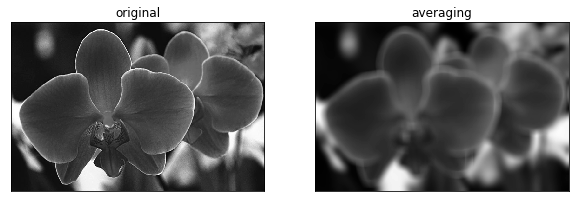

In [178]:

img = cv2.imread('flor.png',0)
kernel = np.ones((25,25),np.float32)/625
dst = cv2.filter2D(img,-1,kernel)

displayGray2(img,dst,"original","averaging")

**FILTRO BLUR usando cv2**


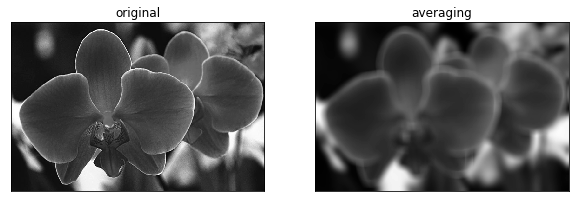

In [180]:
img = cv2.imread('flor.png',0)
blur = cv2.blur(img,(25,25))
displayGray2(img,blur,"original","averaging")


**BLUR Y UMBRALIZACION**

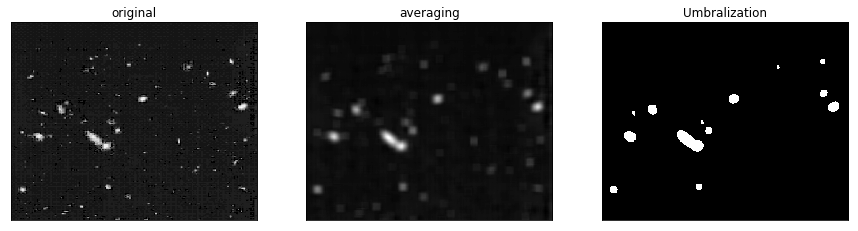

In [209]:
img = cv2.imread('manchas.png',0)
img2 = np.zeros((row,column),dtype = 'uint8')
blur = cv2.blur(img,(15,15))
row,column = blur.shape

min_range = 125
max_range = 255
T = 60
  
for x in range(0,row):
  for y in range(0,column):
    r = blur[x][y]
    if T<=r:
      img2[x][y] = 255
    else :
       img2[x][y] = 0 

          

displayGray3(img,blur,img2,"original","averaging","Umbralization")